#### Analysing the trajectory of the buses

https://archive.ics.uci.edu/ml/machine-learning-databases/00354/GPS%20Trajectory.rar

In [ ]:
import pandas as pd
from dateutil.parser import parse

In [ ]:
# Change the path
filePath1 = '/content/drive/MyDrive/Packt_Colab/pandas_chapter11/chapter11/go_track_tracks.csv'
filePath2 = '/content/drive/MyDrive/Packt_Colab/pandas_chapter11/chapter11/go_track_trackspoints.csv'

In [ ]:
data1 = pd.read_csv(filePath1,delimiter=",")
data1.head()


,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [ ]:
data2 = pd.read_csv(filePath2,delimiter=",")
data2.head()


,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [ ]:
data = pd.merge(data1,data2,left_on='id', right_on="track_id",how="left")

data.head()


,id_x,id_android,speed,time_x,distance,rating,rating_bus,rating_weather,car_or_bus,linha,id_y,latitude,longitude,track_id,time_y
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [ ]:
df = data.drop_duplicates(subset='id_x', keep="first")
df.head()


,id_x,id_android,speed,time_x,distance,rating,rating_bus,rating_weather,car_or_bus,linha,id_y,latitude,longitude,track_id,time_y
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
90,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN,91,-10.939439,-37.062428,2,2014-09-13 13:37:54
203,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN,204,-10.903162,-37.048294,3,2014-09-17 05:09:23
226,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN,227,-10.908893,-37.052372,4,2014-09-17 05:09:23
355,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN,564,-10.943777,-37.052344,8,2014-09-26 15:26:53


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")


In [ ]:
df['Suburb'] = 'NA'

for i in range(len(df)):
    lat = df.iloc[i]['latitude']
    long = df.iloc[i]['longitude']
    coordinates = str(lat) + ',' + str(long)    
    location = geolocator.reverse(coordinates)
    suburb = location.raw['address'].get('suburb', '')
    df['Suburb'].iloc[i] = suburb




In [ ]:
df.head()

,id_x,id_android,speed,time_x,distance,rating,rating_bus,rating_weather,car_or_bus,linha,id_y,latitude,longitude,track_id,time_y,Suburb
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,Grageru
90,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN,91,-10.939439,-37.062428,2,2014-09-13 13:37:54,Grageru
203,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN,204,-10.903162,-37.048294,3,2014-09-17 05:09:23,Industrial
226,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN,227,-10.908893,-37.052372,4,2014-09-17 05:09:23,Centro
355,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN,564,-10.943777,-37.052344,8,2014-09-26 15:26:53,Jardins


In [ ]:
df['Parse_date'] = df['time_y'].apply(lambda x: parse(x))

# Parsing the weekdaty
df['Weekday'] = df['Parse_date'].apply(lambda x: x.weekday())

# Parsing the Day
df['Day'] = df['Parse_date'].apply(lambda x: x.strftime("%A"))

# Parsing the Month
df['Month'] = df['Parse_date'].apply(lambda x: x.strftime("%B"))

# Parsing the Time
df['StartHour'] = df['Parse_date'].apply(lambda x: x.strftime("%H"))

df.head()


In [ ]:
Q1_1 = df.groupby(['Suburb'])['Suburb'].agg('count').sort_values(ascending=False)
Q1_1.head()


Suburb
Industrial       49
São José         12
Coroa do Meio    11
Jabutiana         9
Centro            9
Name: Suburb, dtype: int64

In [ ]:
df['StartHour'] = pd.to_numeric(df['StartHour'])

In [ ]:
cut_bins = [0, 6, 10,15 ,20,23]

In [ ]:

df['cut_hours'] = pd.cut(df['StartHour'], bins=cut_bins)
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_x,id_android,speed,time_x,distance,rating,rating_bus,rating_weather,car_or_bus,linha,id_y,latitude,longitude,track_id,time_y,Suburb,Parse_date,Weekday,Day,Month,StartHour,cut_hours
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,Grageru,2014-09-13 07:24:32,5,Saturday,September,7,"(6, 10]"
90,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN,91,-10.939439,-37.062428,2,2014-09-13 13:37:54,Grageru,2014-09-13 13:37:54,5,Saturday,September,13,"(10, 15]"
203,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN,204,-10.903162,-37.048294,3,2014-09-17 05:09:23,Industrial,2014-09-17 05:09:23,2,Wednesday,September,5,"(0, 6]"
226,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN,227,-10.908893,-37.052372,4,2014-09-17 05:09:23,Centro,2014-09-17 05:09:23,2,Wednesday,September,5,"(0, 6]"
355,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN,564,-10.943777,-37.052344,8,2014-09-26 15:26:53,Jardins,2014-09-26 15:26:53,4,Friday,September,15,"(10, 15]"


In [ ]:

Q2_1 = df.groupby(['cut_hours'])['Suburb'].agg('count')
Q2_1


cut_hours
(0, 6]      22
(6, 10]     59
(10, 15]    49
(15, 20]    28
(20, 23]     4
Name: Suburb, dtype: int64

In [ ]:
Q3_1 = df[pd.arrays.IntervalArray(df['cut_hours']).overlaps(pd.Interval(6, 10))]

In [ ]:

Q3_2 = Q3_1.groupby(['Day'])['Suburb'].agg('count')
Q3_2


Day
Friday        8
Monday        6
Saturday     15
Thursday     13
Tuesday       6
Wednesday    11
Name: Suburb, dtype: int64

In [ ]:
Q3_2 = Q3_2.reindex(index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
Q3_2


Day
Monday        6
Tuesday       6
Wednesday    11
Thursday     13
Friday        8
Saturday     15
Name: Suburb, dtype: int64

Text(0, 0.5, 'Frequency')

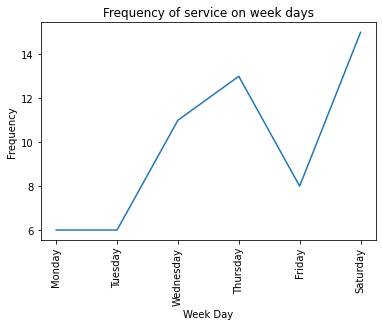

In [ ]:


dayPlot = Q3_2.plot.line(y='Day',rot=90,title = 'Frequency of service on weekdays')

dayPlot.set_xlabel("WeekDay")
dayPlot.set_ylabel("Frequency")
